In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv('Data/credit_card.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [3]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

In [4]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [5]:
from scipy.spatial.distance import cdist

# Assuming X is your feature matrix and kmeans is your KMeans model
cluster_centers = kmeans.cluster_centers_

# Compute distances between each data point and each cluster center
distances = cdist(scaled_df, cluster_centers, 'euclidean')

# distances[i, j] represents the distance between data point i and cluster center j
print(distances)

[[4.1278491  4.69501677 2.82551348]
 [4.28706759 3.5833659  2.40010997]
 [7.1907477  7.55861881 6.57981134]
 ...
 [6.87333629 6.40929592 7.27334885]
 [5.55808465 6.4216032  6.68521843]
 [4.44774272 3.53801704 4.8955068 ]]


In [6]:
pca = PCA()
pca_df = pca.fit_transform(scaled_df)

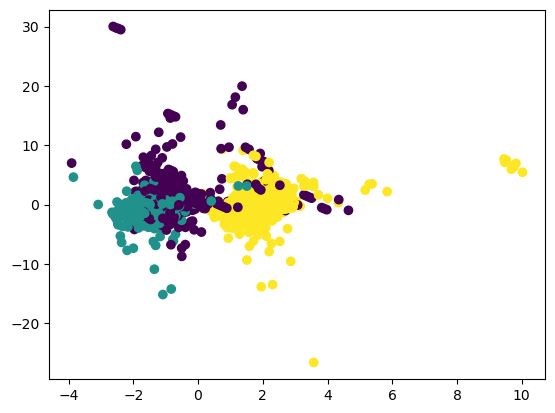

In [7]:
plt.scatter(pca_df[:,0], pca_df[:,1], c=kmeans.labels_)

In [8]:
# Instantiate the model with a contaimination of 0.05 (we will identify 5% as anamolous)
iso_05 = IsolationForest(contamination=0.05, random_state = 42)
# fit the model using .values to avoid a warning
iso_05.fit(pca_df)

IsolationForest(contamination=0.05, random_state=42)

In [9]:
# Obtain results from the model
predictions = iso_05.predict(pca_df)
predictions[:100]

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
# Change the labels to match our columns from the kmeans dataframe
# Not anamolies
predictions[predictions ==1] = 0
# Anomalies
predictions[predictions ==-1] = 1
# Preview new labels
predictions[:100]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Add isolation forest predictions to the dataframe
df['anomaly-iso_05'] = predictions
# Preview dataframe with new column
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly-iso_05
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances[:5]

array([2.82551348, 2.40010997, 6.57981134, 4.71444567, 3.28917859])

In [13]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 95)
threshold

7.416525342710471

In [14]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()

500

In [15]:
iso_anomalies = np.where(filter_anomalies)[0]

In [16]:
# Getting the row indices of the anomalies
#idx_anomalies = pca_df[filter_anomalies].index
#idx_anomalies

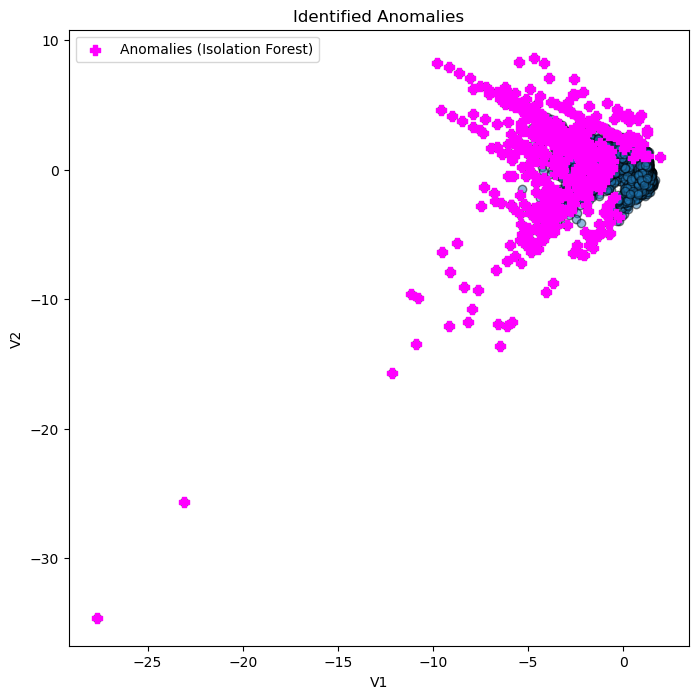

In [17]:
# Plot the original data points
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['V1'], df['V2'], ec= 'black', alpha = 0.5)
ax.set_title("Identified Anomalies")  
    
# Plot the anomalies identified by the isolation forest
df.loc[iso_anomalies].plot(
    x="V1", y="V2", kind="scatter", color="magenta", label="Anomalies (Isolation Forest)", 
    ax=ax, marker='P', s=50);

In [18]:
# Make a list of anomolies identified in both methods
both = [a for a in iso_anomalies if a in kmeans_anomalies]

NameError: name 'kmeans_anomalies' is not defined